For this project, we will be creating a machine learning algorithm that identifies if a doodle is a specific emoji.

In [0]:
import gdown
import numpy as np
import pickle

# Download files from Google Drive
# We decided not to included all 345 of the datasets from QuickDraw becasue it 
# would take too long to download all of the data. Also, it would take longer 
# for the model to run and could make the model less accurate as there are more 
# classes for the model to predict.
gdown.download('https://drive.google.com/uc?authuser=0&id=1kDKvFQHXrtqvLhMa77_tUNmP8CF7NM-f&export=download', 'full_numpy_bitmap_airplane.npy', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1sABEUqy71w8xsKGpthHl2gryYs0MUjs0&export=download', 'full_numpy_bitmap_basketball.npy', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=10ST7uZi8-HQSjILx8KNgoa0qJ_uFMZT8&export=download', 'full_numpy_bitmap_bee.npy', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1DNsNAzhu81cig_eq38JXRY5tfx6De6ys&export=download', 'full_numpy_bitmap_bicycle.npy', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1JAsaZZtJ60N0lmaXohCLtv573BKCyauR&export=download', 'full_numpy_bitmap_butterfly.npy', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=15M_ZQ85VScNKk88-9T-Jf-jUcwPLmWiq&export=download', 'full_numpy_bitmap_cookie.npy', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1T65x42xmaJbvpDIlA8o_zftjQqZZkgMz&export=download', 'full_numpy_bitmap_helicopter.npy', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1KRrZ6ndvI2TewXRgttAFXFS-I_ATsk1j&export=download', 'full_numpy_bitmap_lightbulb.npy', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1tNO0YN6d6tsMc2adZkrnjsdthbr1a20u&export=download', 'full_numpy_bitmap_pants.npy', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1VDxNwdzuhYrznBqD6R2jWzem5LSi-ikc&export=download', 'full_numpy_bitmap_strawberry.npy', False)


Downloading...
From: https://drive.google.com/uc?authuser=0&id=1kDKvFQHXrtqvLhMa77_tUNmP8CF7NM-f&export=download
To: /content/full_numpy_bitmap_airplane.npy
119MB [00:00, 229MB/s] 
Downloading...
From: https://drive.google.com/uc?authuser=0&id=1sABEUqy71w8xsKGpthHl2gryYs0MUjs0&export=download
To: /content/full_numpy_bitmap_basketball.npy
105MB [00:00, 201MB/s]  
Downloading...
From: https://drive.google.com/uc?authuser=0&id=10ST7uZi8-HQSjILx8KNgoa0qJ_uFMZT8&export=download
To: /content/full_numpy_bitmap_bee.npy
94.8MB [00:00, 230MB/s]
Downloading...
From: https://drive.google.com/uc?authuser=0&id=1DNsNAzhu81cig_eq38JXRY5tfx6De6ys&export=download
To: /content/full_numpy_bitmap_bicycle.npy
99.2MB [00:00, 219MB/s] 
Downloading...
From: https://drive.google.com/uc?authuser=0&id=1JAsaZZtJ60N0lmaXohCLtv573BKCyauR&export=download
To: /content/full_numpy_bitmap_butterfly.npy
92.5MB [00:00, 130MB/s] 
Downloading...
From: https://drive.google.com/uc?authuser=0&id=15M_ZQ85VScNKk88-9T-Jf-jUcwPLmWi

'full_numpy_bitmap_strawberry.npy'

In [0]:
# Load the downloaded data
airplane_data = np.load('full_numpy_bitmap_airplane.npy', encoding ='bytes', allow_pickle=True)
basketball_data = np.load('full_numpy_bitmap_basketball.npy', encoding ='bytes', allow_pickle=True)
bee_data = np.load('full_numpy_bitmap_bee.npy', encoding ='bytes', allow_pickle=True)
bicycle_data = np.load('full_numpy_bitmap_bicycle.npy', encoding ='bytes', allow_pickle=True)
butterfly_data = np.load('full_numpy_bitmap_butterfly.npy', encoding ='bytes', allow_pickle=True)
cookie_data = np.load('full_numpy_bitmap_cookie.npy', encoding ='bytes', allow_pickle=True)
helicopter_data = np.load('full_numpy_bitmap_helicopter.npy', encoding ='bytes', allow_pickle=True)
lightbulb_data = np.load('full_numpy_bitmap_lightbulb.npy', encoding ='bytes', allow_pickle=True)
pants_data = np.load('full_numpy_bitmap_pants.npy', encoding ='bytes', allow_pickle=True)
strawberry_data = np.load('full_numpy_bitmap_strawberry.npy', encoding ='bytes', allow_pickle=True)

(0.0, 28.0, 28.0, 0.0)

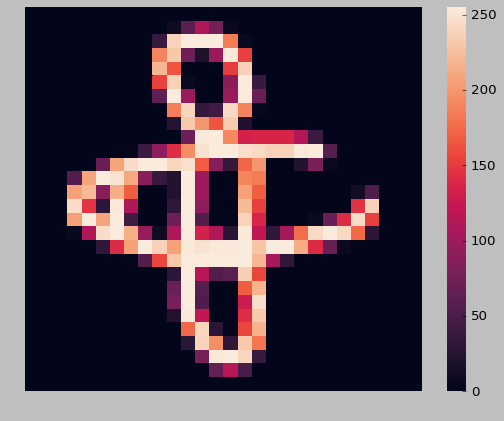

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; 
from google.colab import files

# Test to see if the the data has been imported correctly
ax = sns.heatmap(np.reshape(bee_data[30001], (28, 28)))
ax.axis('off')

In [0]:
# Number of drawings included in the dataset for each class
datasetSize = 5000

# Grab the first 5000 drawings from each of the imported datasets and combine 
# them into a single array. These will be the drawings that we will use to train
# our model.
dataset1 = np.concatenate([airplane_data[0:datasetSize], basketball_data[0:datasetSize], bee_data[0:datasetSize], bicycle_data[0:datasetSize], butterfly_data[0:datasetSize], cookie_data[0:datasetSize], helicopter_data[0:datasetSize], lightbulb_data[0:datasetSize], pants_data[0:datasetSize], strawberry_data[0:datasetSize]])

# Grab the second 5000 drawings from each of the imported datasets and combine 
# them into a single array. These will be the drawings that we will use to test 
# our model.
dataset2 = np.concatenate([airplane_data[datasetSize+1:datasetSize*2+1], basketball_data[datasetSize+1:datasetSize*2+1], bee_data[datasetSize+1:datasetSize*2+1], bicycle_data[datasetSize+1:datasetSize*2+1], butterfly_data[datasetSize+1:datasetSize*2+1], cookie_data[datasetSize+1:datasetSize*2+1], helicopter_data[datasetSize+1:datasetSize*2+1], lightbulb_data[datasetSize+1:datasetSize*2+1], pants_data[datasetSize+1:datasetSize*2+1], strawberry_data[datasetSize+1:datasetSize*2+1]])
dataset1.shape

(50000, 784)

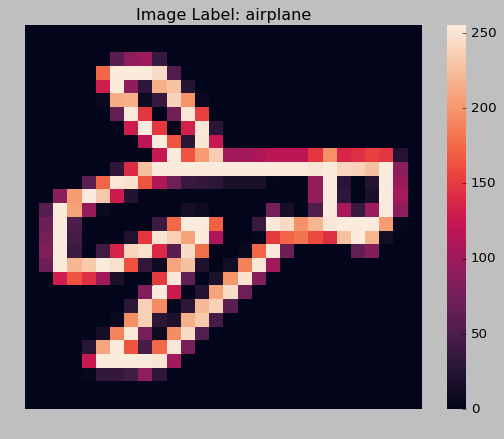

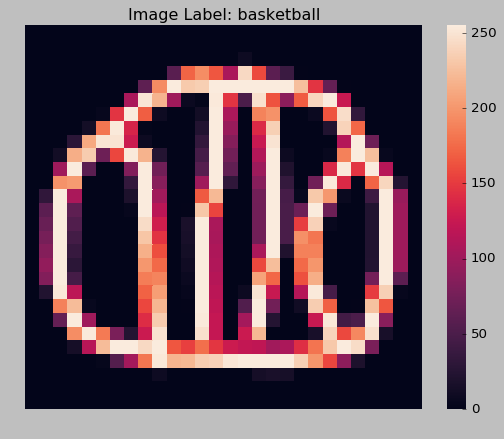

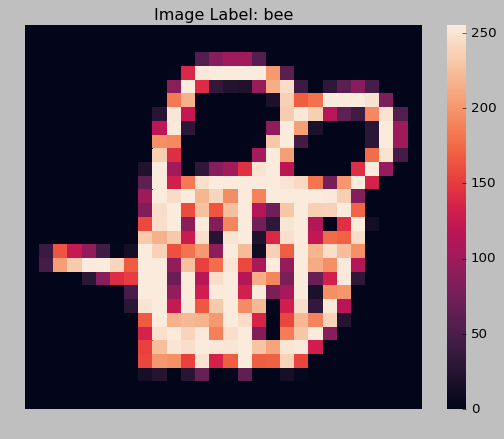

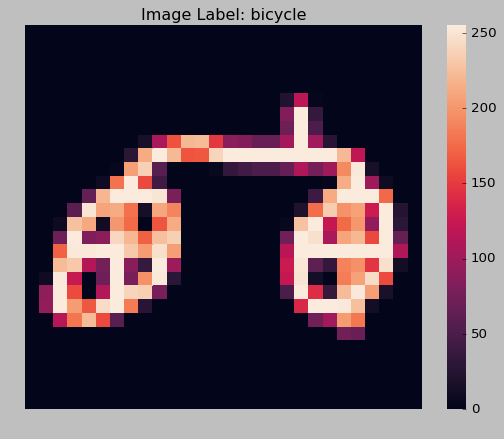

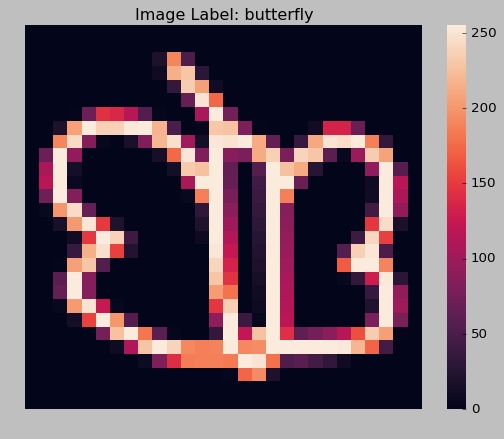

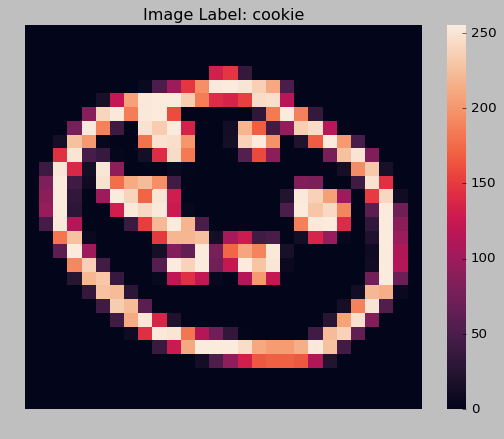

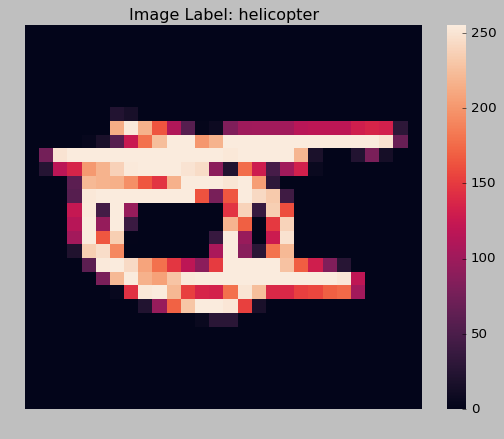

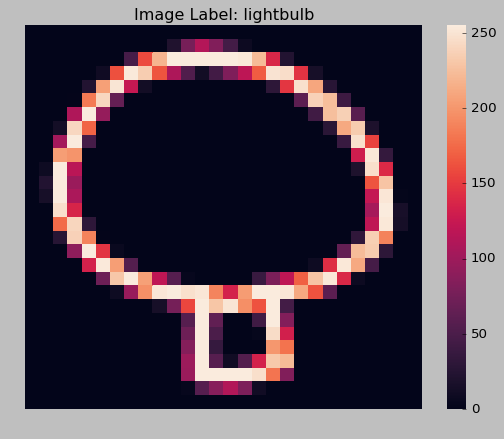

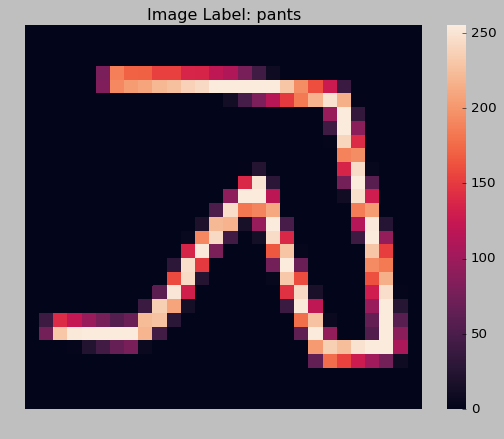

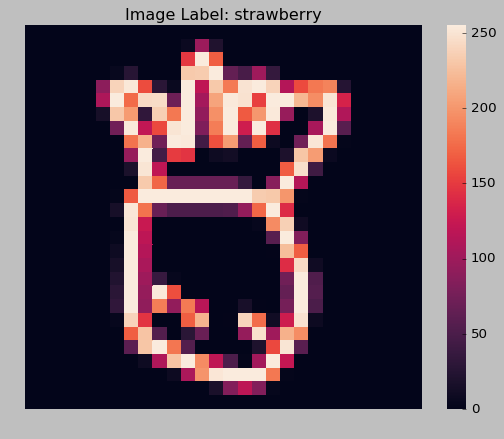

In [0]:
classes = ('airplane', 'basketball', 'bee', 'bicycle', 'butterfly', 'cookie', 'helicopter', 'lightbulb', 'pants', 'strawberry')

# Check to see if dataset1 was concatenated properly. Plot every 5000 to make
# sure none of the data is duplicated and that there is an equal amount of data
# for each drawing sets, corresponding to the variable datasetSize.
for i in range(10):
  ax = sns.heatmap(np.reshape(dataset1[i*datasetSize], (28, 28)))
  plt.axis('off')
  plt.title('Image Label: '+ classes[i])
  plt.show()

In [0]:
# Initate a None list with an index of 50001 and assign the first item to be 0
labels = [None] * 50001
start = 0
labels[0] = 0

# Iterate through the number of classes in our model and reassign the Nones to 
# their specific class
for j in range(0,len(classes)):
  # Iterate through the list and assign the class number to 
  for i in range(1+start,5001+start):
    labels[i] = j
  start += 5000

# Delete the last element in the list
labels.pop()

9

In [0]:
!pip install torchviz
from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable
from torchviz import make_dot
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


import matplotlib.pyplot as plt
import numpy as np # we always love numpy
import time

In [0]:
# Create a dictionary that stores associates the correct label to the correct 
# drawing (data). Assign the data to be float32 so it can be properly mapped for
# for the model later.
training_data = {"data": torch.from_numpy(dataset1.astype(np.float32)), "labels":labels}
testing_data = {"data": torch.from_numpy(dataset2.astype(np.float32)), "labels":labels}


In [0]:
from torch.utils.data import Dataset

# Define a QuickdrawData data structure so the CNN can parse our data
class QuickdrawData(Dataset):
  def __init__(self, data):
    super(QuickdrawData, self).__init__()
    self.data = data

  def __len__(self):
    return len(self.data["labels"])
  
  def __getitem__(self, index):
    data, label = self.data['data'][index].reshape((28, 28)).unsqueeze(0), self.data['labels'][index]
    return data, label

quickdraw = QuickdrawData(training_data)

In [0]:
# Data set information
image_dims = 1, 28, 28
n_training_samples = 50000 # How many training images to use
n_test_samples = 50000 # How many test images to use
classes = ('airplane', 'basketball', 'bee', 'bicycle', 'butterfly', 'cookie', 'helicopter', 'lightbulb', 'pants', 'strawberry')

# Load the training set
train_set = QuickdrawData(training_data)
train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))

#Load the test set
test_set = QuickdrawData(testing_data)
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

training set input data shape torch.Size([50000, 784])
Number of training outputs 50000


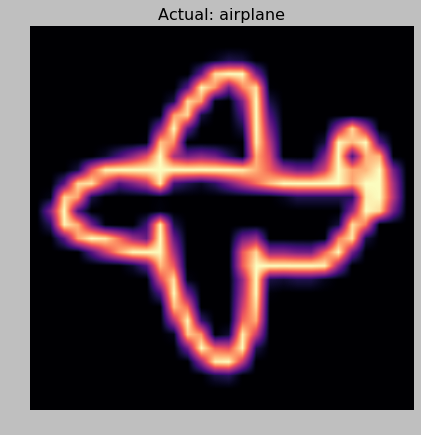

In [0]:
def disp_image(image, class_idx, predicted=None):
    plt.imshow(image.squeeze(), cmap="magma")
    plt.axis('off')

    if predicted:
        plt.title("Actual: " + classes[class_idx] + "     Predicted: " + classes[predicted])
    else:
        plt.title("Actual: " + classes[class_idx])
    plt.show()

print("training set input data shape", train_set.data['data'].shape)
print("Number of training outputs", len(train_set))
x, y = train_set[4]
disp_image(x, y)


In [0]:
class doodleCNN(nn.Module):
    # The init funciton in Pytorch classes is used to keep track of the parameters of the model
    # specifically the ones we want to update with gradient descent + backprop
    # So we need to make sure we keep track of all of them here
    def __init__(self, num_kernels):
        super(doodleCNN, self).__init__()
        # layers defined here


        # Make sure you understand what this convolutional layer is doing.
        # E.g., considering looking at help(nn.Conv2D).  Draw a picture of what
        # this layer does to the data.

        # note: image_dims[0] will be 3 as there are 3 color channels (R, G, B)
        num_kernels = 16
        self.conv1 = nn.Conv2d(image_dims[0], num_kernels, kernel_size=3, stride=1, padding=1)

        # Make sure you understand what this MaxPool2D layer is doing.
        # E.g., considering looking at help(nn.MaxPool2D).  Draw a picture of
        # what this layer does to the data.

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # maxpool_output_size is the total amount of data coming out of that
        # layer.  We have an exercise that asks you to explain why the line of
        # code below computes this quantity.
        self.maxpool_output_size = int(num_kernels * (image_dims[1] / 2) * (image_dims[2] / 2))

        # Add on a fully connected layer (like in our MLP)
        # fc stands for fully connected
        fc1_size = 64
        self.fc1 = nn.Linear(self.maxpool_output_size, fc1_size)

        # we'll use this activation function internally in the network
        self.activation_func = torch.nn.ReLU()

        # Convert our fully connected layer into outputs that we can compare to the result
        fc2_size = len(classes)
        self.fc2 = nn.Linear(fc1_size, fc2_size)

        # Note: that the output will not represent the probability of the
        # output being in each class.  The loss function we will use
        # `CrossEntropyLoss` will take care of convering these values to
        # probabilities and then computing the log loss with respect to the
        # true label.  We could break this out into multiple steps, but it turns
        # out that the algorithm will be more numerically stable if we do it in
        # one go.  We have included a cell to show you the documentation for
        # `CrossEntropyLoss` if you'd like to check it out.
        
    # The forward function in the class defines the operations performed on a given input to the model
    # and returns the output of the model
    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.activation_func(x)
        # this code flattens the output of the convolution, max pool,
        # activation sequence of steps into a vector
        x = x.view(-1, self.maxpool_output_size)
        x = self.fc1(x)
        x = self.activation_func(x)
        x = self.fc2(x)
        return x

    # The loss function (which we chose to include as a method of the class, but doesn't need to be)
    # returns the loss and optimizer used by the model
    def get_loss(self, learning_rate):
      # Loss function
      loss = nn.CrossEntropyLoss()
      # Optimizer, self.parameters() returns all the Pytorch operations that are attributes of the class
      optimizer = optim.Adam(self.parameters(), lr=learning_rate)
      return loss, optimizer

In [0]:
# Define training parameters
batch_size = 32
learning_rate = 1e-2
n_epochs = 10
# Get our data into the mini batch size that we defined
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                           sampler=train_sampler, num_workers=2)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=128, sampler=test_sampler, num_workers=2)

def train_model(net):
    """ Train a the specified network.

        Outputs a tuple with the following four elements
        train_hist_x: the x-values (batch number) that the training set was 
            evaluated on.
        train_loss_hist: the loss values for the training set corresponding to
            the batch numbers returned in train_hist_x
        test_hist_x: the x-values (batch number) that the test set was 
            evaluated on.
        test_loss_hist: the loss values for the test set corresponding to
            the batch numbers returned in test_hist_x
    """ 
    loss, optimizer = net.get_loss(learning_rate)
    # Define some parameters to keep track of metrics
    print_every = 20
    idx = 0
    train_hist_x = []
    train_loss_hist = []
    test_hist_x = []
    test_loss_hist = []

    training_start_time = time.time()
    # Loop for n_epochs
    for epoch in range(n_epochs):
        running_loss = 0.0
        start_time = time.time()

        for i, data in enumerate(train_loader, 0):

            # Get inputs in right form
            inputs, labels = data
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
            
            # In Pytorch, We need to always remember to set the optimizer gradients to 0 before we recompute the new gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = net(inputs)
            
            # Compute the loss and find the loss with respect to each parameter of the model
            loss_size = loss(outputs, labels)
            loss_size.backward()
            
            # Change each parameter with respect to the recently computed loss.
            optimizer.step()

            # Update statistics
            running_loss += loss_size.data.item()
            
            # Print every 20th batch of an epoch
            if (i % print_every) == print_every-1:
                
                print("Epoch {}, Iteration {}\t train_loss: {:.2f} took: {:.2f}s".format(
                    epoch + 1, i+1,running_loss / print_every, time.time() - start_time))
                # Reset running loss and time
                train_loss_hist.append(running_loss / print_every)
                train_hist_x.append(idx)
                running_loss = 0.0
                start_time = time.time()
            idx += 1

        # At the end of the epoch, do a pass on the test set
        total_test_loss = 0
        for inputs, labels in test_loader:

            # Wrap tensors in Variables
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

            # Forward pass
            test_outputs = net(inputs)
            test_loss_size = loss(test_outputs, labels)
            total_test_loss += test_loss_size.data.item()
        test_loss_hist.append(total_test_loss / len(test_loader))
        test_hist_x.append(idx)
        print("Validation loss = {:.2f}".format(
            total_test_loss / len(test_loader)))

    print("Training finished, took {:.2f}s".format(
        time.time() - training_start_time))
    return train_hist_x, train_loss_hist, test_hist_x, test_loss_hist

In [0]:
device = 'cuda' # 'cpu' if we want to not use the gpu
# Initialize the model, loss, and optimization function
net = doodleCNN(128)
# This tells our model to send all of the tensors and operations to the GPU (or keep them at the CPU if we're not using GPU)
net.to(device)

doodleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=64, bias=True)
  (activation_func): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
# Train the CNN
train_hist_x, train_loss_hist, test_hist_x, test_loss_hist = train_model(net)

Epoch 1, Iteration 20	 train_loss: 170.14 took: 0.41s
Epoch 1, Iteration 40	 train_loss: 2.27 took: 0.12s
Epoch 1, Iteration 60	 train_loss: 2.23 took: 0.12s
Epoch 1, Iteration 80	 train_loss: 2.22 took: 0.12s
Epoch 1, Iteration 100	 train_loss: 2.16 took: 0.13s
Epoch 1, Iteration 120	 train_loss: 2.19 took: 0.12s
Epoch 1, Iteration 140	 train_loss: 2.11 took: 0.12s
Epoch 1, Iteration 160	 train_loss: 2.09 took: 0.11s
Epoch 1, Iteration 180	 train_loss: 2.04 took: 0.12s
Epoch 1, Iteration 200	 train_loss: 1.98 took: 0.12s
Epoch 1, Iteration 220	 train_loss: 2.05 took: 0.12s
Epoch 1, Iteration 240	 train_loss: 2.00 took: 0.11s
Epoch 1, Iteration 260	 train_loss: 1.97 took: 0.12s
Epoch 1, Iteration 280	 train_loss: 1.97 took: 0.12s
Epoch 1, Iteration 300	 train_loss: 1.95 took: 0.12s
Epoch 1, Iteration 320	 train_loss: 1.88 took: 0.12s
Epoch 1, Iteration 340	 train_loss: 1.93 took: 0.12s
Epoch 1, Iteration 360	 train_loss: 1.89 took: 0.11s
Epoch 1, Iteration 380	 train_loss: 1.86 took: 0

In [0]:
def get_accuracy(net, loader):
    # Calculate the accuracy for the traing and testing data predictions
    n_correct = 0
    n_total = 0
    for i, data in enumerate(loader, 0):
        # Get inputs in right form
        inputs, labels = data
        inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

        # Forward pass
        outputs = net(inputs)
        n_correct += np.sum(np.argmax(outputs.cpu().detach().numpy(), axis=1) == labels.cpu().numpy())
        n_total += labels.shape[0]
    return n_correct/n_total

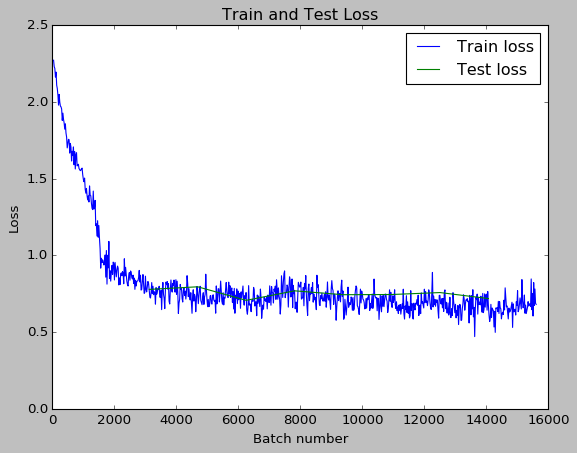

Train accuracy is 0.80742
Test accuracy is 0.77778


In [0]:
# Plot of our training loss and validation loss
plt.plot(train_hist_x[1:-1],train_loss_hist[1:-1])
plt.plot(test_hist_x[1:-1],test_loss_hist[1:-1])
plt.legend(['Train loss', 'Test loss'])
plt.xlabel('Batch number')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.show()

# Print the accuracy for the training and testing predictions
print("Train accuracy is", get_accuracy(net, train_loader))
print("Test accuracy is", get_accuracy(net, test_loader))

Actual: airplane


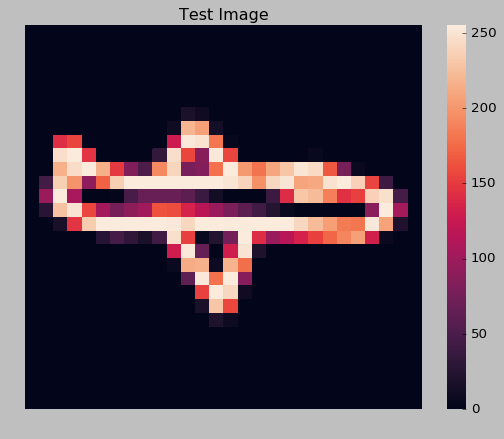

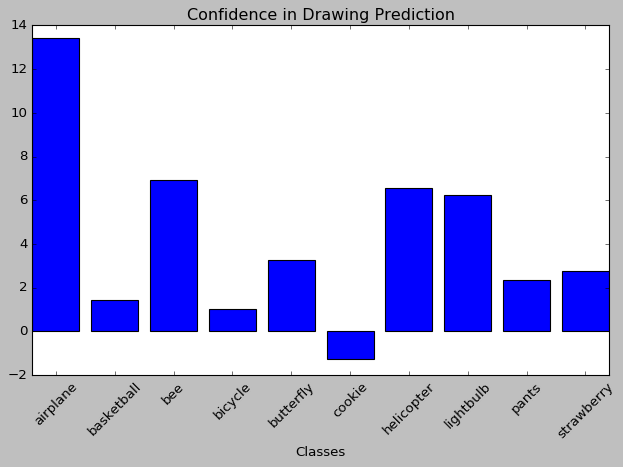

Predicted: airplane


In [0]:
#Test the trained CNN on a single test image
dataArr, label = test_set[80] #Change this to test new images
print('Actual:',classes[label])
inputs = dataArr.to(device).unsqueeze(0)
outputs = net(inputs)

# Show the drawing that is being identified and predicted
ax = sns.heatmap(inputs.squeeze(0).squeeze(0).cpu().numpy())
plt.axis('off')
plt.title('Test Image')
plt.show()

# Bar graph to show the different model predictions of the drawing
plt.bar(classes, outputs.detach().cpu().numpy()[0])
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('')
plt.title('Confidence in Drawing Prediction')
plt.tight_layout()
plt.show()
prediction = np.argmax(outputs.cpu().detach().numpy())
print('Predicted:', classes[prediction])

In [0]:
# Create all-zeros 10x10 confusion matrix
confusionMatrix = [[0 for i in range(10)] for j in range(10)]

# Iterate through data to update each element of the matrix
for data in test_set:
        # Get inputs in right form
        drawing, label = data
        outputs = net(drawing.to(device).unsqueeze(0))
        prediction = np.argmax(outputs.cpu().detach().numpy())
        confusionMatrix[label][prediction] += 1 
# The rows and columns are the labels in alphabetical order-airplane, 
# basketball, bee, bicycle, butterfly, cookie, helicopter, lightbulb, pants, and
# strawberry
print("Confusion Matrix:")
confusionMatrix

Confusion Matrix:


[[4285, 9, 215, 31, 64, 9, 354, 5, 10, 19],
 [160, 3252, 429, 49, 304, 476, 205, 16, 37, 72],
 [870, 45, 3143, 44, 226, 66, 521, 10, 12, 63],
 [182, 3, 93, 4136, 67, 32, 443, 4, 33, 7],
 [195, 29, 302, 23, 3758, 53, 426, 9, 33, 172],
 [110, 259, 104, 20, 52, 3937, 261, 26, 14, 217],
 [527, 13, 237, 39, 147, 68, 3877, 18, 12, 62],
 [318, 26, 81, 4, 84, 56, 243, 3932, 32, 224],
 [79, 25, 39, 34, 66, 35, 106, 41, 4541, 34],
 [178, 5, 212, 10, 104, 244, 128, 72, 18, 4028]]